<a href="https://colab.research.google.com/github/atoothman/DATA-70500/blob/main/DATA_70500_Toothman_NonCommunicable_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 70500 - Working with Data Project

This project provides an analysis of the top five non-communicable diseases contributing to DALYs (Disability-Adjusted Life Years) in the United States and the differences in DALYs by gender from 2000 to 2021.

**Data Source:** https://www.healthdata.org/research-analysis/gbd

**Dataset Description:**


*   measure_name
*   location_name
*   sex_name
  *   male
  *   female
  *   both
*   year
  *  2000-2021


*   cause_name (category of non-communicable disease)
  *   Cardiovascular diseases
  *   Neoplasms
  *   Musculoskeletal disorders
  *   Mental disorders
  *   Neurological disorders
  *   Diabetes and kidney diseases
  *   Chronic respiratory diseases
  *   Substance use disorders
  *   Other non-communicable diseases
  *   Digestive diseases
  *   Sense organ diseases
  *   Skin and subcutaneous diseases



# Import libraries, load datset and examine data

In [114]:
!pip install pyreadr

In [115]:
# Import Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
import polars as po
import pyreadr

In [116]:
# Upload file to colab
from google.colab import files
uploaded = files.upload()

Saving NonCommunicable Disease.csv to NonCommunicable Disease (3).csv


In [117]:
# Load CSV into dataframe
ncd = pd.read_csv('NonCommunicable Disease (1).csv')

In [118]:
ncd.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,2,DALYs (Disability-Adjusted Life Years),102,United States of America,1,Male,22,All ages,294,All causes,1,Number,2000,4.522572e+07,4.985095e+07,4.117955e+07
1,2,DALYs (Disability-Adjusted Life Years),102,United States of America,2,Female,22,All ages,294,All causes,1,Number,2000,4.425854e+07,5.024614e+07,3.897605e+07
2,2,DALYs (Disability-Adjusted Life Years),102,United States of America,3,Both,22,All ages,294,All causes,1,Number,2000,8.948427e+07,1.001548e+08,8.020517e+07
3,2,DALYs (Disability-Adjusted Life Years),102,United States of America,1,Male,22,All ages,410,Neoplasms,1,Number,2000,7.415339e+06,7.595257e+06,7.161253e+06
4,2,DALYs (Disability-Adjusted Life Years),102,United States of America,2,Female,22,All ages,410,Neoplasms,1,Number,2000,6.796334e+06,7.022050e+06,6.415272e+06


In [119]:
# Check for missing values
ncd.isnull().sum()

,0
measure_id,0
measure_name,0
location_id,0
location_name,0
sex_id,0
sex_name,0
age_id,0
age_name,0
cause_id,0
cause_name,0


In [120]:
ncd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     924 non-null    int64  
 1   measure_name   924 non-null    object 
 2   location_id    924 non-null    int64  
 3   location_name  924 non-null    object 
 4   sex_id         924 non-null    int64  
 5   sex_name       924 non-null    object 
 6   age_id         924 non-null    int64  
 7   age_name       924 non-null    object 
 8   cause_id       924 non-null    int64  
 9   cause_name     924 non-null    object 
 10  metric_id      924 non-null    int64  
 11  metric_name    924 non-null    object 
 12  year           924 non-null    int64  
 13  val            924 non-null    float64
 14  upper          924 non-null    float64
 15  lower          924 non-null    float64
dtypes: float64(3), int64(7), object(6)
memory usage: 115.6+ KB


In [121]:
# Summary Stats
ncd.describe()

,measure_id,location_id,sex_id,age_id,cause_id,metric_id,year,val,upper,lower
count,924.0,924.0,924.000000,924.0,924.000000,924.0,924.000000,9.240000e+02,9.240000e+02,9.240000e+02
mean,2.0,102.0,2.000000,22.0,590.928571,1.0,2010.500000,1.284610e+07,1.472280e+07,1.122413e+07
std,0.0,0.0,0.816939,0.0,186.200783,0.0,6.347725,2.208879e+07,2.479815e+07,1.975581e+07
min,2.0,102.0,1.000000,22.0,294.000000,1.0,2000.000000,7.787626e+05,9.657743e+05,5.366671e+05
25%,2.0,102.0,1.000000,22.0,491.000000,1.0,2005.000000,2.346981e+06,2.909622e+06,1.920044e+06
50%,2.0,102.0,2.000000,22.0,550.000000,1.0,2010.500000,4.290479e+06,5.403273e+06,3.320573e+06
75%,2.0,102.0,3.000000,22.0,653.000000,1.0,2016.000000,8.061417e+06,9.726365e+06,7.221533e+06
max,2.0,102.0,3.000000,22.0,974.000000,1.0,2021.000000,1.266681e+08,1.414649e+08,1.137835e+08


# Top non-communicable diseases by DALYs from years 2000-2021 (both genders included)

In [144]:
# Filter gender (sex_name) to both to include both name and female over time
filtered_ncd_both = ncd.loc[ncd['sex_name'] == 'Both']


In [145]:
# Drop rows where cause_name is "All Causes" or "Non-Communicable Diseases" because of redundancy in dataset
filtered_ncd_both = filtered_ncd_both[~filtered_ncd_both['cause_name'].isin(['All causes', 'Non-communicable diseases'])]

In [146]:
# Sum of NCD for both genders over time
ncd_cause_data_both = filtered_ncd_both.groupby('cause_name')['val'].sum().sort_values(ascending=False)
print(ncd_cause_data_both)

cause_name
Cardiovascular diseases            3.629808e+08
Neoplasms                          3.304610e+08
Musculoskeletal disorders          2.250651e+08
Mental disorders                   1.733344e+08
Neurological disorders             1.399219e+08
Diabetes and kidney diseases       1.289633e+08
Chronic respiratory diseases       1.222998e+08
Substance use disorders            1.037587e+08
Other non-communicable diseases    9.851608e+07
Digestive diseases                 7.581626e+07
Sense organ diseases               5.724706e+07
Skin and subcutaneous diseases     4.385885e+07
Name: val, dtype: float64


<ipython-input-147-503455806265>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ncd_cause_data_both.index, y=ncd_cause_data_both.values, palette="Blues_d")


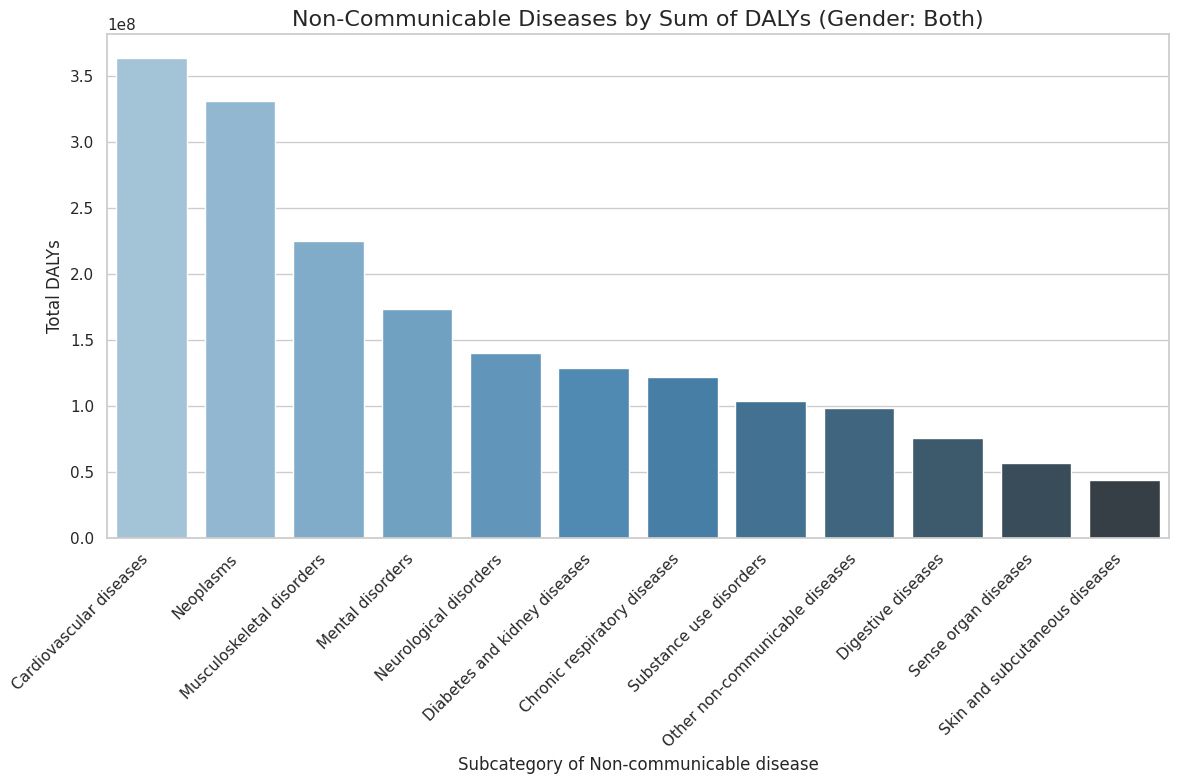

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a bar plot of the top NCD causes
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.barplot(x=ncd_cause_data_both.index, y=ncd_cause_data_both.values, palette="Blues_d")

# Add titles and labels
plt.title('Non-Communicable Diseases by Sum of DALYs (Gender: Both)', fontsize=16)
plt.xlabel('Subcategory of Non-communicable disease', fontsize=12)
plt.ylabel('Total DALYs', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

The data visualization shows the total DALYs for the subcategories of non-communicable diseases over 21 years. The top five contributors to DALYs are cardiovascular diseases, neoplasms, musculoskeletal disorders, mental disorders, and neurological disorders

In [126]:
# Filter Data for top 5 ncd
# List of the top 5 diseases
top_5_diseases_list = [
    'Cardiovascular diseases',
    'Neoplasms',
    'Musculoskeletal disorders',
    'Mental disorders',
    'Neurological disorders'
]

In [127]:
# Filter the data to include only the top 5 diseases
top_5_data = filtered_ncd_both[filtered_ncd_both['cause_name'].isin(top_5_diseases_list)]

In [128]:
# Group by 'year' and 'cause_name', then sum the 'val' (DALYs)
top_5_yearly = top_5_data.groupby(['year', 'cause_name'])['val'].sum().reset_index()
print(top_5_yearly)

     year                 cause_name           val
0    2000    Cardiovascular diseases  1.717457e+07
1    2000           Mental disorders  7.501615e+06
2    2000  Musculoskeletal disorders  8.547590e+06
3    2000                  Neoplasms  1.421167e+07
4    2000     Neurological disorders  5.358636e+06
..    ...                        ...           ...
105  2021    Cardiovascular diseases  1.775994e+07
106  2021           Mental disorders  9.257996e+06
107  2021  Musculoskeletal disorders  1.195375e+07
108  2021                  Neoplasms  1.605610e+07
109  2021     Neurological disorders  7.469285e+06

[110 rows x 3 columns]


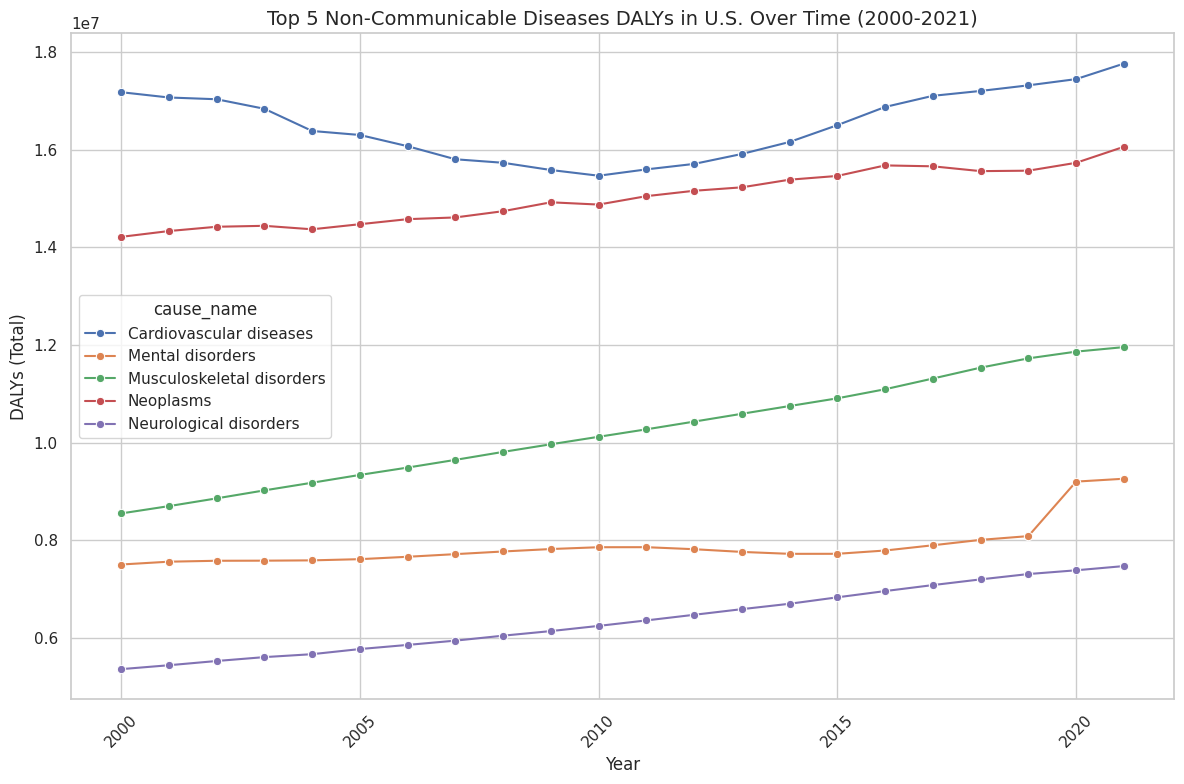

In [129]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a line plot to show DALYs over time for the top 5 diseases
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_5_yearly, x='year', y='val', hue='cause_name', marker='o')

# Add titles and labels
plt.title('Top 5 Non-Communicable Diseases DALYs in U.S. Over Time (2000-2021)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DALYs (Total)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 non-communicable disease by DALYs by Gender

In [172]:
# Filter gender (sex_name) to female
filtered_ncd_female = ncd.loc[ncd['sex_name'] == 'Female']

# Scale female data to millions (1e6) for easier comparison
filtered_ncd_female['val'] = filtered_ncd_female['val'] / 1e6

# Filter the data to include only the year 2021
filtered_ncd_female_2021 = filtered_ncd_female[filtered_ncd_female['year'] == 2021]


# Drop rows where cause_name is "All Causes" or "Non-Communicable Diseases" because of redundancy in dataset
filtered_ncd_female_2021 = filtered_ncd_female_2021[~filtered_ncd_female_2021['cause_name'].isin(['All causes', 'Non-communicable diseases'])]

# Sum of NCD for female
ncd_cause_data_female_2021 = filtered_ncd_female_2021.groupby('cause_name')['val'].sum().sort_values(ascending=False)

# Display the NCD data for female in 2021
print("Total List of NCD by DALYs for Female 2021")
print(ncd_cause_data_female_2021)


Total List of NCD by DALYs for Female 2021
cause_name
Cardiovascular diseases            7.674265
Neoplasms                          7.543788
Musculoskeletal disorders          6.928802
Mental disorders                   5.392517
Neurological disorders             4.578794
Diabetes and kidney diseases       3.680390
Chronic respiratory diseases       3.521231
Substance use disorders            2.997663
Other non-communicable diseases    2.912166
Digestive diseases                 1.801985
Sense organ diseases               1.503155
Skin and subcutaneous diseases     1.215228
Name: val, dtype: float64


<ipython-input-172-092b84f2f994>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ncd_female['val'] = filtered_ncd_female['val'] / 1e6


<ipython-input-182-f2c2272b7872>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ncd_cause_data_female_2021.index, y=ncd_cause_data_female_2021.values, palette="Greens_d")


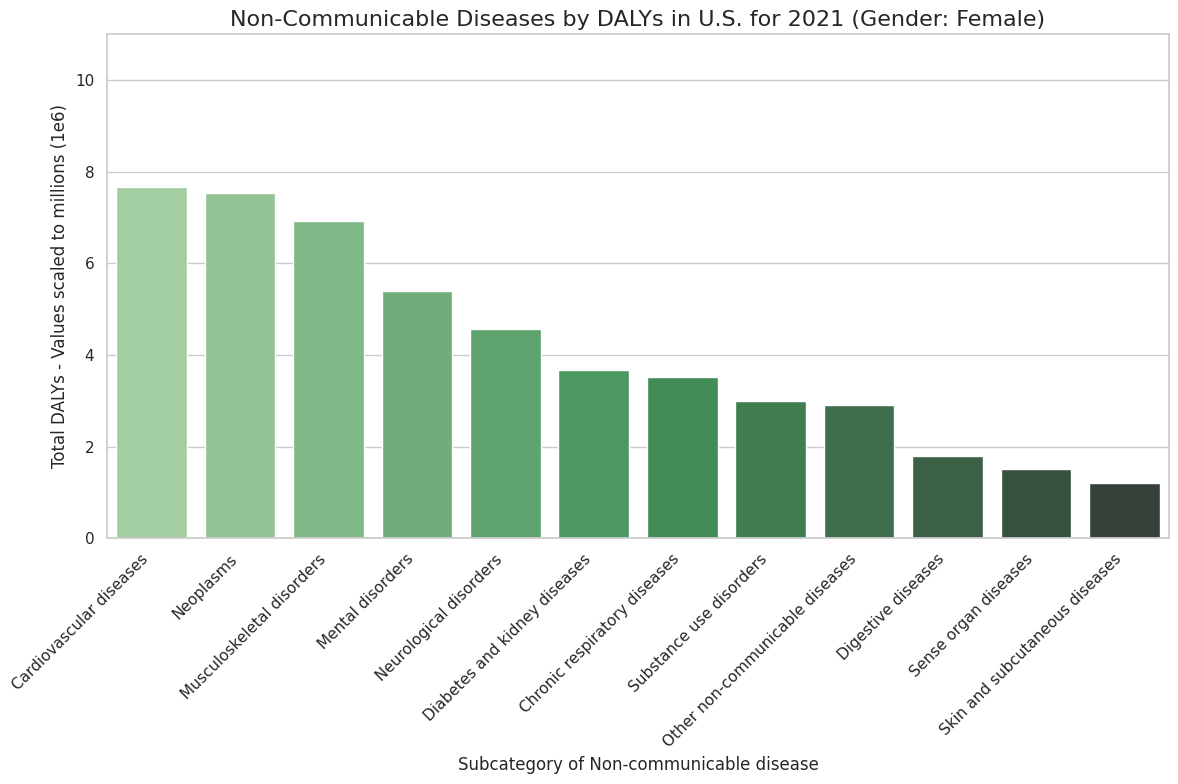

In [182]:
# Create a bar plot of the top 5 NCD causes for female
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.barplot(x=ncd_cause_data_female_2021.index, y=ncd_cause_data_female_2021.values, palette="Greens_d")

# Add titles and labels
plt.title('Non-Communicable Diseases by DALYs in U.S. for 2021 (Gender: Female)', fontsize=16)
plt.xlabel('Subcategory of Non-communicable disease', fontsize=12)
plt.ylabel('Total DALYs - Values scaled to millions (1e6)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Set the y-axis limit to 11 so consistency on both dvs
plt.ylim(0, 11)

# Show the plot
plt.tight_layout()
plt.show()

The data visualization shows the total DALYs for the subcategories of non-communicable diseases over 21 years for females. The top five contributors to DALYs are cardiovascular diseases, neoplasms, musculoskeletal disorders, mental disorders, and neurological disorders

In [174]:
# Filter gender (sex_name) to male
filtered_ncd_male = ncd.loc[ncd['sex_name'] == 'Male']

# Scale male data to millions (1e6) for easier comparison
filtered_ncd_male['val'] = filtered_ncd_male['val'] / 1e6

# Filter the data to include only the year 2021
filtered_ncd_male_2021 = filtered_ncd_male[filtered_ncd_male['year'] == 2021]


# Drop rows where cause_name is "All Causes" or "Non-Communicable Diseases" because of redundancy in dataset
filtered_ncd_male_2021 = filtered_ncd_male_2021[~filtered_ncd_male_2021['cause_name'].isin(['All causes', 'Non-communicable diseases'])]

# Sum of NCD for both genders over time
ncd_cause_data_male_2021 = filtered_ncd_male_2021.groupby('cause_name')['val'].sum().sort_values(ascending=False)
print("Total List of NCD by DALYs for Male in 2021")
print(ncd_cause_data_male_2021)

Total List of NCD by DALYs for Male in 2021
cause_name
Cardiovascular diseases            10.085671
Neoplasms                           8.512316
Musculoskeletal disorders           5.024944
Substance use disorders             4.869553
Diabetes and kidney diseases        4.373833
Mental disorders                    3.865478
Chronic respiratory diseases        3.164745
Neurological disorders              2.890490
Digestive diseases                  2.119191
Other non-communicable diseases     1.997273
Sense organ diseases                1.525095
Skin and subcutaneous diseases      0.966553
Name: val, dtype: float64


<ipython-input-174-72a9614e17ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ncd_male['val'] = filtered_ncd_male['val'] / 1e6


<ipython-input-181-dbff75e2c140>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ncd_cause_data_male_2021.index, y=ncd_cause_data_male_2021.values, palette="Reds_d")


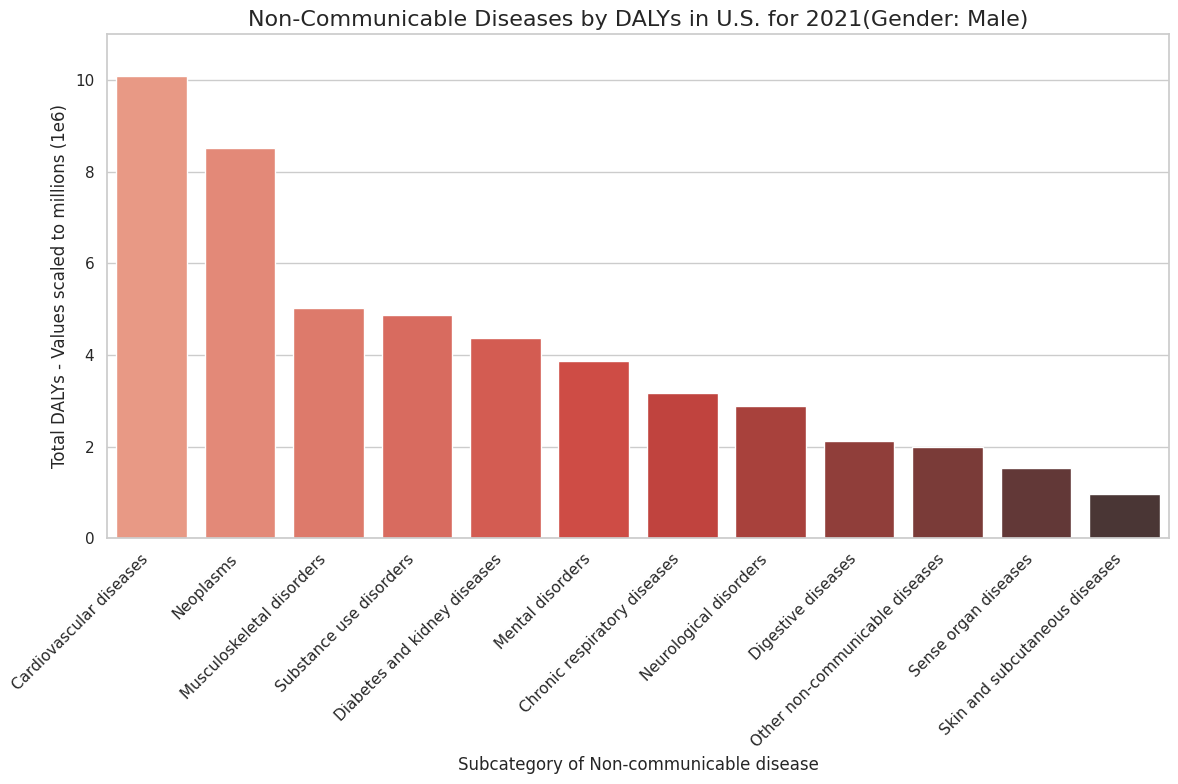

In [181]:
# Create a bar plot of the top 5 NCD causes for male
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.barplot(x=ncd_cause_data_male_2021.index, y=ncd_cause_data_male_2021.values, palette="Reds_d")

# Add titles and labels
plt.title('Non-Communicable Diseases by DALYs in U.S. for 2021(Gender: Male)', fontsize=16)
plt.xlabel('Subcategory of Non-communicable disease', fontsize=12)
plt.ylabel('Total DALYs - Values scaled to millions (1e6)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Set the y-axis limit to 11 so consistency on both dvs
plt.ylim(0, 11)

# Show the plot
plt.tight_layout()
plt.show()

The data visualization shows the total DALYs for the subcategories of non-communicable diseases over 21 years for males. The top five contributors to DALYs are cardiovascular diseases, neoplasms, musculoskeletal disorders, mental disorders, and diabetes & kidney disease.

#  Top 5 non-communicable disease by DALYs by Gender from 2000-2021

In [176]:
# Filter the data to include only the top 5 diseases for female
top_5_data_female = filtered_ncd_female[filtered_ncd_female['cause_name'].isin(top_5_diseases_list)]

In [177]:
# Group by 'year' and 'cause_name', then sum the 'val' (DALYs) for female
top_5_yearly_female = top_5_data_female.groupby(['year', 'cause_name'])['val'].sum().reset_index()
print(top_5_yearly_female)

     year                 cause_name       val
0    2000    Cardiovascular diseases  7.960946
1    2000           Mental disorders  4.335565
2    2000  Musculoskeletal disorders  5.064560
3    2000                  Neoplasms  6.796334
4    2000     Neurological disorders  3.434877
..    ...                        ...       ...
105  2021    Cardiovascular diseases  7.674265
106  2021           Mental disorders  5.392517
107  2021  Musculoskeletal disorders  6.928802
108  2021                  Neoplasms  7.543788
109  2021     Neurological disorders  4.578794

[110 rows x 3 columns]


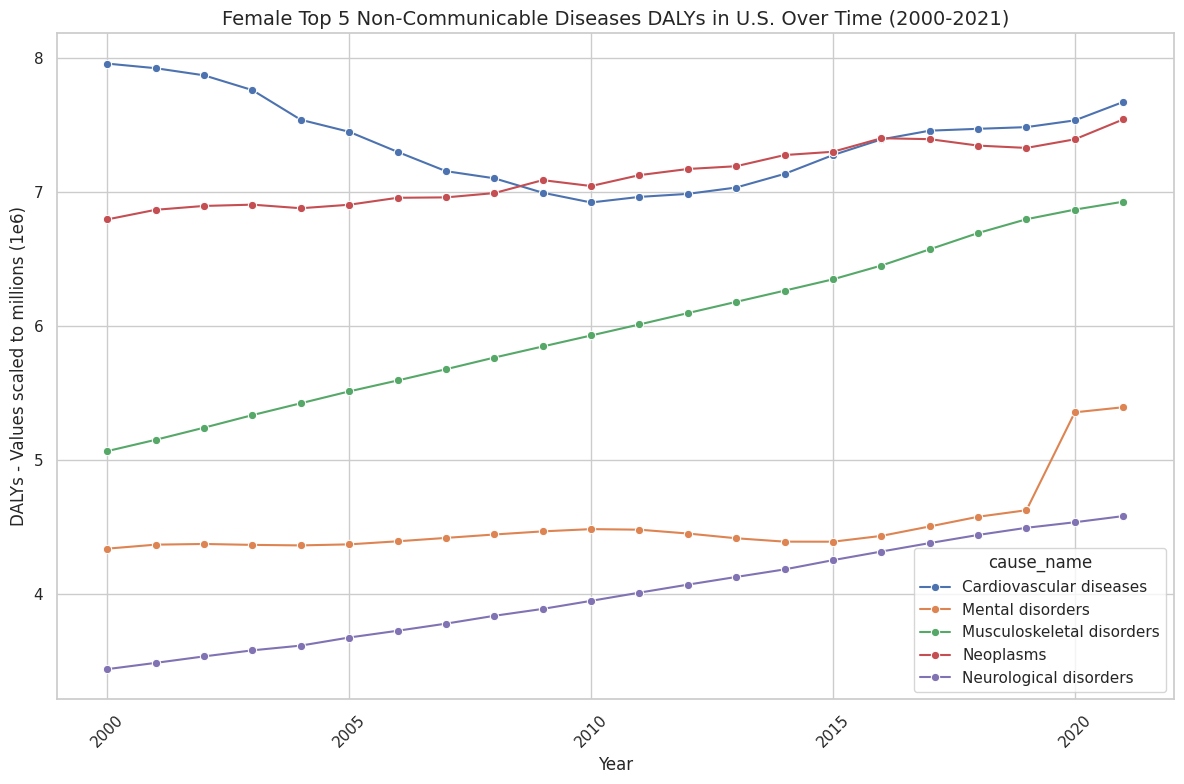

In [178]:
# Create Line Graph of top 5 ncd by female

# Set the style for the plot
sns.set(style="whitegrid")

# Create a line plot to show DALYs over time for the top 5 diseases
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_5_yearly_female, x='year', y='val', hue='cause_name', marker='o')

# Add titles and labels
plt.title('Female Top 5 Non-Communicable Diseases DALYs in U.S. Over Time (2000-2021)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DALYs - Values scaled to millions (1e6)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [179]:
# Filter the data to include only the top 5 diseases for male
top_5_data_male = filtered_ncd_male[filtered_ncd_male['cause_name'].isin(top_5_diseases_list)]

# Group by 'year' and 'cause_name', then sum the 'val' (DALYs) for male
top_5_yearly_male = top_5_data_male.groupby(['year', 'cause_name'])['val'].sum().reset_index()
print(top_5_yearly_male)

     year                 cause_name        val
0    2000    Cardiovascular diseases   9.213619
1    2000           Mental disorders   3.166051
2    2000  Musculoskeletal disorders   3.483030
3    2000                  Neoplasms   7.415339
4    2000     Neurological disorders   1.923759
..    ...                        ...        ...
105  2021    Cardiovascular diseases  10.085671
106  2021           Mental disorders   3.865478
107  2021  Musculoskeletal disorders   5.024944
108  2021                  Neoplasms   8.512316
109  2021     Neurological disorders   2.890490

[110 rows x 3 columns]


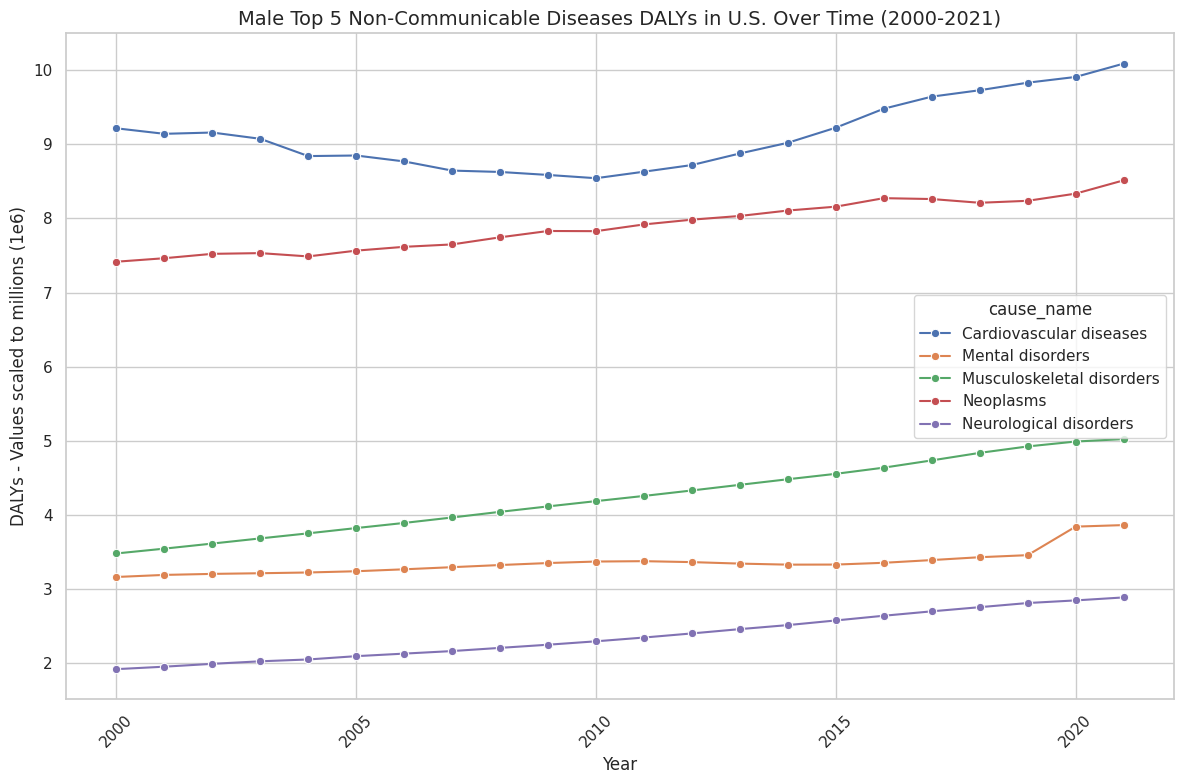

In [180]:
# Create Line Graph of top 5 ncd by male

# Set the style for the plot
sns.set(style="whitegrid")

# Create a line plot to show DALYs over time for the top 5 diseases
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_5_yearly_male, x='year', y='val', hue='cause_name', marker='o')

# Add titles and labels
plt.title('Male Top 5 Non-Communicable Diseases DALYs in U.S. Over Time (2000-2021)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('DALYs - Values scaled to millions (1e6)', fontsize=12)


# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#

